Prendre en compte le nombre de risque pris en compte ? 

Faire varier le niveau de changement de température ? (Par exemple, RCPX.X ? )

Comment prendre en compte l'équité inter-temporelle : taux d'actualisation

Comment prendre en compte la valeur de la vie ? => indice de GINI inter-national

Comment prendre en compte les inégalités sociales ? 

Prise en compte de phénomènes non-monétaires ? 

Quelle est ma question dans cette partie ? 

### Dans l'article de Gillingham : 

Input : 
- population growth
- GDP growth rate
- climate sensitivity

Output: 
- CO2 concentration
- Temperature
- Output (GDP)
- Output log 
- Emissions
- Population
- Radiative Forcings
- Damages
- SCC

=> moi ce qui m'intéresse en output c'est les domages (niveau, répartition, etc.). Et même ce qui m'intéresse c'est quels inputs font varier le plus ces domages. 

Pour ça, il y a plusieurs choses : 

Des variables en input
La forme des fonctions de dommage
Leur niveau de désagrégation (spatiale, par risque)

Ce à quoi il faut que je réflechisse, c'est comment faire des runs qui permettent de refleter ces différents choix. 

- Equité spatiale : voir si je peux faire varier la variables qui permet de normaliser les dommages selon les régions : compter différements les dommages selon le niveau de vie des régions (aujourd'hui, compté selon le PIB, mais en réalité dégats humains donc on pourrait faire l'hypothèse qu'il faut au contraire multiplier / surpondérer les dommages dans les pays pauvres)
- Equite temporelle : faire une regression avec : plein de runs differents qui simulent plein de chose. on on actualise la valeur totale des dommage de chaque run avec différents taux d'actualisation. On régresse pour voir l'effet que ça a
- Equité sociale ? En gros la même chose mais par décile ? 


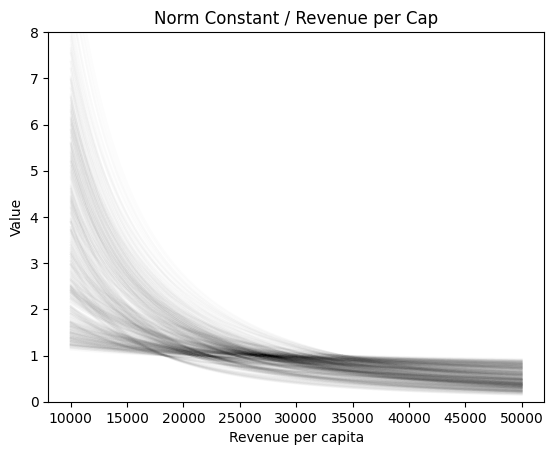

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns


norm_constants = np.random.normal(25000, 5000, 25)
revenue_per_cap = np.linspace(10000, 50000, 1000)
exponents = np.random.uniform(0.1, 2, 25)


# Assuming norm_constant and revenue_per_cap are available as variables
for norm_constant in norm_constants: 
    for exponent in exponents: 
        # Calculate the ratio
        normalisation_value = (norm_constant / revenue_per_cap)**exponent

        # Plot the ratio
        sns.lineplot(x=revenue_per_cap, y=normalisation_value, estimator=None, alpha=0.01, color='black')

#plt.plot(x=revenue_per_cap,  y=ratio)


plt.ylim(0, 8)
plt.xlabel('Revenue per capita')
plt.ylabel('Value')
plt.title('Norm Constant / Revenue per Cap')
plt.show()

In [1]:
import pandas as pd
import xarray as xr
import numpy as np

In [13]:
variables = pd.read_csv('../../../variables.csv')
variables_interest = variables[variables['isEquation']==True] # This line excludes variables without EQ
variables_interest.head()

,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,Equation,isEquation
3,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,46,True
9,9,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,5,True
12,12,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,6,True
18,18,DSK: A.128: EQ shock from climate change,dsk_a128_eq_shock_from_climate_change,NaN,NaN,"(nan, nan)",Constant,Normal,TODO,DSK,A.128,True
22,22,FUND: A.1: EQ Total agricultural impact,fund_a1_eq_total_agricultural_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,FUND,A.1,True


In [3]:
df_df = pd.read_csv('../../../df_airtable.csv')
df_df['Model'] = df_df['Model - new table'].apply(lambda x: x.split(' ')[0])

variables_interest['Model'] = variables_interest['Model'].str.strip()
variables_interest['Equation'] = variables_interest['Equation'].str.strip()

df_df['Model'] = df_df['Model'].str.strip()
df_df['Equation number'] = df_df['Equation number'].str.strip() 

merged = variables_interest.merge(df_df, left_on=['Model', 'Equation'], right_on=['Model', 'Equation number'], how='left')
merged.head()

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_60216\359772982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Model'] = variables_interest['Model'].str.strip()
C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_60216\359772982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Equation'] = variables_interest['Equation'].str.strip()


,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,...,Equation shape,Formule,Equation form,Zotero reference,IPCC risks,Input categories,Output categories,Latex fragment,Vensim,Vensim name
0,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,5.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l l}{{\ }}&{{\displaystyle=\psi_...,Oui,NaN
2,11,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,6.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l}{{\Lambda({\bf t})\;=\;\theta_...,Oui,NaN
3,16,DSK: A.128: EQ shock from climate change,dsk_a128_eq_shock_from_climate_change,NaN,NaN,"(nan, nan)",Constant,Normal,TODO,DSK,...,NaN,128.png (https://v5.airtableusercontent.com/v3...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,"\text{SHOCKS}~t \sim Beta(\theta_{s1,t}, \thet...",En cours,NaN
4,19,FUND: A.1: EQ Total agricultural impact,fund_a1_eq_total_agricultural_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,FUND,...,NaN,a1.png (https://v5.airtableusercontent.com/v3/...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction",Production,Production,"A_{t,r}=A_{t,r}^{r}+A_{t,r}^{l}+A_{t,r}^{f}",Oui,FUND total agricultural impact


In [4]:
variables_interest_names = variables_interest['Py Name'].values
variables_interest_names = np.concatenate((variables_interest_names, ['time', 'temperature_change', 'total_population']))


In [11]:
total_damage_equations = merged[merged['Equation'].str.strip()=='TOT']
total_damage_equations = total_damage_equations['Py Name'].values


In [22]:
total_damage_equations = variables[variables['Real Name'].str.contains('TOT:')]
total_damage_equations = total_damage_equations['Py Name'].values
total_damage_equations

array(['define_tot_define_total_impact', 'dice_tot_dice_total_impact',
       'dsk_tot_dsk_total_impact', 'fund_tot_eq_moneraty_impact',
       'fund_tot_eq_total_deaths', 'fund_tot_eq_fund_total_impact',
       'fund_tot_total_damage', 'witness_tot_witness_total_impact'],
      dtype=object)

In [6]:
total_damage_equations = ['fund_tot_eq_fund_total_impact', 
                          'witness_dicelike_damage_eq_dicelike_damage',
                          'witness_tipping_point_damage_eq_tipping_point_damge', 
                          'define_46_eq_damage_function', 
                          'dsk_a128_eq_shock_from_climate_change', 
                          'dice_5_eq_damage_function']

In [23]:
ds = xr.open_dataset('../../../results/results_run_small.nc')
df = ds[total_damage_equations].to_dataframe().reset_index()
ds.close()
df

,time,REGIONS 35 I,define_tot_define_total_impact,dice_tot_dice_total_impact,dsk_tot_dsk_total_impact,fund_tot_eq_moneraty_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_witness_total_impact
0,2005.0,AUSTRIA,776.028824,937.444172,0.0,NaN,NaN,NaN,NaN,1583.982127
1,2005.0,BELGIUM,938.734045,1133.992363,0.0,1.379671e+09,5.746519e+06,2.846619e+13,4.973581e+06,1916.085981
2,2005.0,BULGARIA,101.115339,122.147505,0.0,2.799410e+08,5.009851e+01,3.229255e+08,8.615126e+05,206.390387
3,2005.0,CROATIA,101.190474,122.238269,0.0,2.565073e+08,2.853332e+01,2.996817e+08,1.519235e+06,206.543749
4,2005.0,CYPRUS,41.500998,50.133278,0.0,9.993271e+07,5.360278e+05,1.631465e+12,3.055627e+06,84.709275
...,...,...,...,...,...,...,...,...,...,...
205,2010.0,INDIA,5495.539455,6576.737894,0.0,1.186540e+10,8.946210e+03,1.371395e+10,2.179162e+05,11116.056390
206,2010.0,LATAM,8556.396658,10239.791489,0.0,1.647715e+10,2.435179e+03,1.946608e+10,1.237100e+06,17307.379654
207,2010.0,RUSSIA,3687.888132,4413.447274,0.0,7.563595e+09,1.032700e+03,8.945402e+09,1.345453e+06,7459.644821
208,2010.0,USMCA,55419.567871,66322.874226,0.0,6.834983e+10,3.318372e+03,8.937213e+10,6.379057e+06,112099.466595


In [25]:
df_grouped = df.groupby(['time']).sum().reset_index()
df_grouped=df_grouped.drop(columns=['REGIONS 35 I'])
df_grouped

,time,define_tot_define_total_impact,dice_tot_dice_total_impact,dsk_tot_dsk_total_impact,fund_tot_eq_moneraty_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_witness_total_impact
0,2005.0,153127.100548,184977.804451,0.0,3.125920e+11,2.047170e+08,7.917856e+14,9.284357e+07,312553.584414
1,2006.0,160363.229738,193465.905108,0.0,3.156485e+11,2.095907e+08,8.132622e+14,9.297320e+07,326910.069199
2,2007.0,168600.179479,203081.230664,0.0,3.187289e+11,2.150582e+08,8.370117e+14,9.308313e+07,343175.749435
3,2008.0,177665.244232,213602.617407,0.0,3.218499e+11,2.209613e+08,8.624291e+14,9.317658e+07,360977.600378
4,2009.0,187483.417055,224922.559429,0.0,3.250175e+11,2.272170e+08,8.891903e+14,9.325552e+07,380134.883965
5,2010.0,198022.406069,236981.550670,0.0,3.282348e+11,2.337782e+08,9.171063e+14,9.332107e+07,400548.162805


<Axes: xlabel='time'>

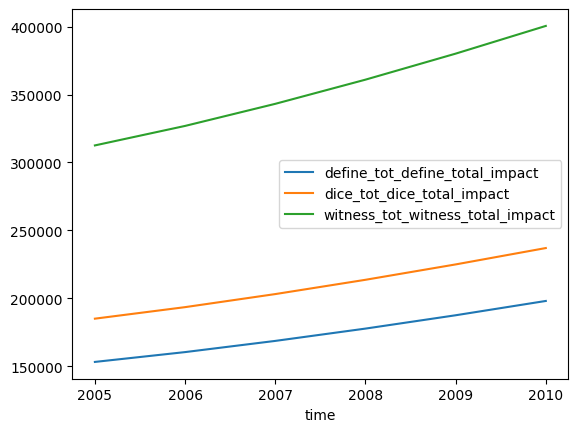

In [35]:
df_grouped_no_fund = df_grouped.drop(columns=['fund_tot_eq_fund_total_impact', 'fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths', 'fund_tot_total_damage', 'dsk_tot_dsk_total_impact'])
df_grouped_no_fund.plot(x='time')

In [36]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I'], var_name='equation',  value_vars=total_damage_equations, value_name='total_damage')
df_melted.head()

,time,REGIONS 35 I,equation,total_damage
0,2005.0,AUSTRIA,define_tot_define_total_impact,776.028824
1,2005.0,BELGIUM,define_tot_define_total_impact,938.734045
2,2005.0,BULGARIA,define_tot_define_total_impact,101.115339
3,2005.0,CROATIA,define_tot_define_total_impact,101.190474
4,2005.0,CYPRUS,define_tot_define_total_impact,41.500998


Equation form represents the shape of the equation. Subscripts represents the level of spatial agregation (by region or global). Number of equation represents the complexity of the model. 

In [37]:
equation_shape = merged[['Py Name', 'Equation form', 'Subscripts']]
equation_shape.head()

,Py Name,Equation form,Subscripts
0,define_46_eq_damage_function,NaN,NaN
1,dice_5_eq_damage_function,Quadratic,NaN
2,dice_6_eq_abatment_function,Quadratic,NaN
3,dsk_a128_eq_shock_from_climate_change,NaN,NaN
4,fund_a1_eq_total_agricultural_impact,NaN,['REGIONS 35 I']


In [38]:
data = df_melted.merge(equation_shape, left_on='equation', right_on='Py Name', how='left')
data = data.drop(columns=['Py Name'])
data['Equation form'] = data['Equation form'].fillna('Exponential')
data['Subscripts'] = data['Subscripts'].fillna('None')
data = data.dropna()
data

,time,REGIONS 35 I,equation,total_damage,Equation form,Subscripts
0,2005.0,AUSTRIA,define_tot_define_total_impact,776.028824,Exponential,None
1,2005.0,BELGIUM,define_tot_define_total_impact,938.734045,Exponential,None
2,2005.0,BULGARIA,define_tot_define_total_impact,101.115339,Exponential,None
3,2005.0,CROATIA,define_tot_define_total_impact,101.190474,Exponential,None
4,2005.0,CYPRUS,define_tot_define_total_impact,41.500998,Exponential,None
...,...,...,...,...,...,...
1675,2010.0,INDIA,witness_tot_witness_total_impact,11116.056390,Exponential,None
1676,2010.0,LATAM,witness_tot_witness_total_impact,17307.379654,Exponential,None
1677,2010.0,RUSSIA,witness_tot_witness_total_impact,7459.644821,Exponential,None
1678,2010.0,USMCA,witness_tot_witness_total_impact,112099.466595,Exponential,None


In [39]:
import statsmodels.api as sm

# Variables à ajouter : 

dummy_variables = ['Equation form', 'Subscripts']
drop_columns = data.columns.difference(dummy_variables)

df_regression = data.copy()
df_regression = pd.get_dummies(df_regression, columns=dummy_variables, drop_first=True)

y = df_regression['total_damage']
X = df_regression.drop(columns=drop_columns, axis=1)

X = sm.add_constant(X)

X = X.astype(float)
y = y.astype(float)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:            total_damage   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     32.57
Date:              mer., 10 juil. 2024   Prob (F-statistic):           1.41e-14
Time:                         10:52:37   Log-Likelihood:                -49404.
No. Observations:                 1536   AIC:                         9.881e+04
Df Residuals:                     1533   BIC:                         9.883e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1.667e+18   6.71e+25   2.48e-08      1.000   -1.32e+26    1.32e+26
Equation form_Exponential   -1.667e+18   6.71e+25  -2.48e-08      1.000   -1.32e+26    1.32e+26
Subscripts_['REGIONS 35 I'] -1.667e+18   6.71e+25  -2.48e-08      1.000   -1.32e+26    1.32e+26
==============================================================================
Omnibus:                     2339.119   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637358.105
Skew:                           9.397   Prob(JB):                         0.00
Kurtosis:                     101.008   Cond. No.                     2.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Question de recherche : Quels sont les principaux déterminants du niveau de dommage produit par une fonction de dommage (et son corrolaire, à quel point une fonction de dommage est sensible à ces hypothèses)

Donc si je veux faire une régression, la variable expliquée est le niveau de dommage. Ce doit toujours être la même, qui pourrait s'appeler "Dommage" par exemple. 

Les variables explicatives sont : 
- le modèle (FUND, DICE, etc)
- le type de fonction (quadratique, linéaire, etc)
- le nombre d'équation ? 
- le nombre de variables / secteurs couverts ? 
- le niveau d'aggrégation spatiale ? 
- un proxy du taux d'actualisation ? 


Je cherche donc à avoir un tableau de données qui ressemble à ça : 

| Niveau de dommage | Modèle | Type de fonction | Nombre d'équations |
|-------------------|--------|------------------|--------------------|
| 1567522767826      |   FUND     |         Elasticité         |      12              |
| 387974089787                  |    DICE    |     Quadratique             |  1                  |
|                   |        |                  |                    |
|                   |        |                  |                    |

ValueError: Could not interpret value `total_population` for `x`. An entry with this name does not appear in `data`.

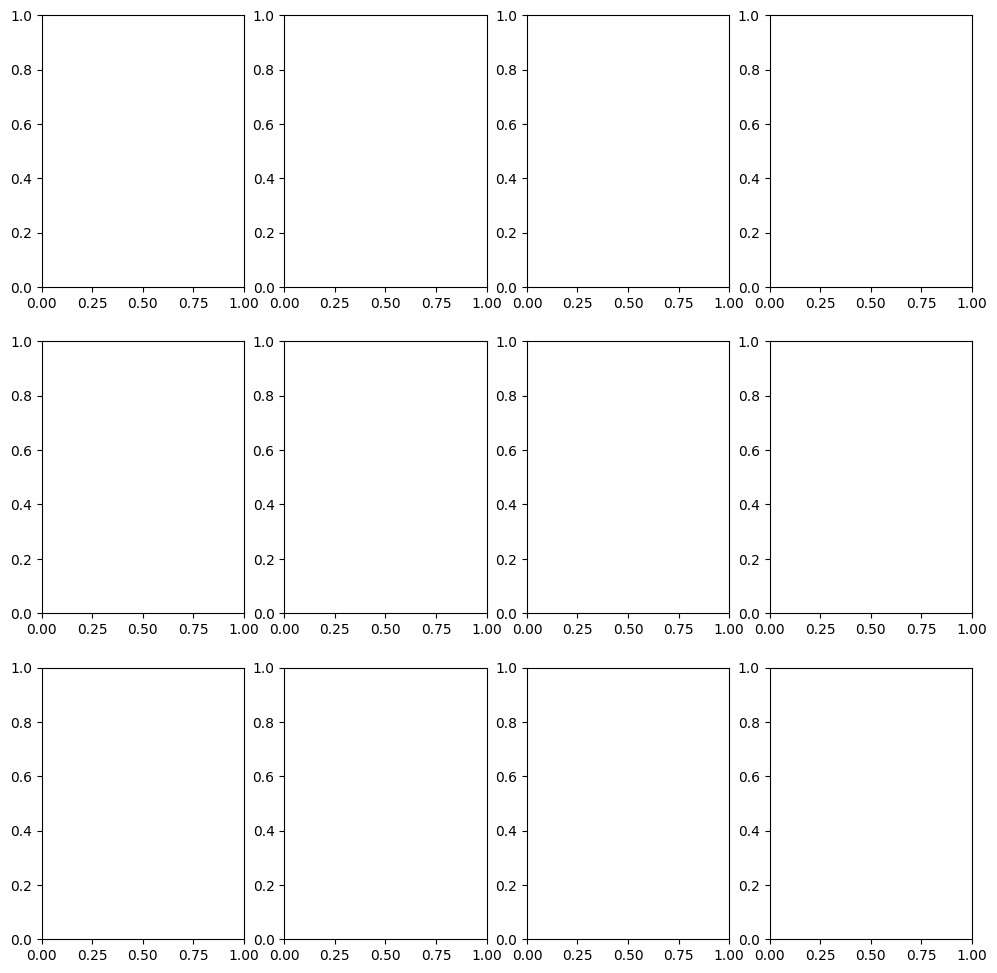

In [136]:
import matplotlib.pyplot as plt

# Define the drivers and models
drivers = ['total_population', 'temperature_change', 'gini_gdppc_eu27', 'time']
models = ['Model 1', 'Model 2', 'Model 3']

# Create the figure and subplots
fig, axs = plt.subplots( len(models), len(drivers), figsize=(12, 12))



# Loop through each subplot

for j, driver in enumerate(drivers):
    for i, model in enumerate(models):
        
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, ax=axs[i, j], hue='REGIONS 35 I', palette=['lightgrey']*len(data['REGIONS 35 I'].unique()), legend=False)
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, color='grey', linewidth=2, ax=axs[i, j], estimator='mean')

        # Set the title and labels for the current subplot
        #axs[i, j].set_title(f'{driver}')
        axs[i, j].set_xlabel(driver)
        axs[i, j].set_ylabel(f'Total Damage in {model}')

# Adjust the spacing between subplots
plt.tight_layout()
#plt.title('Damage drivers in different models')

# Show the figure
plt.show()